C:\Users\sneha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log
C:\Users\sneha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: invalid value encountered in multiply


Test Accuracy: 94.74%
Test Precision: 90.00%
Test Recall: 94.74%


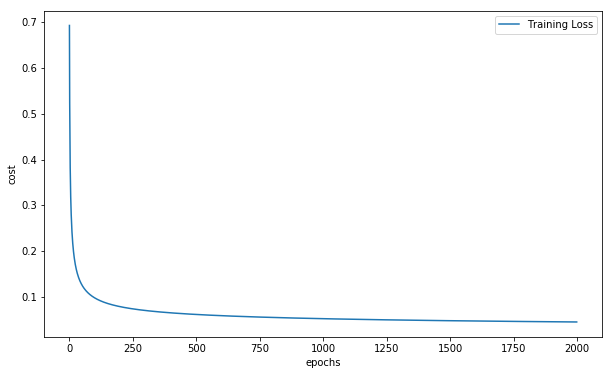

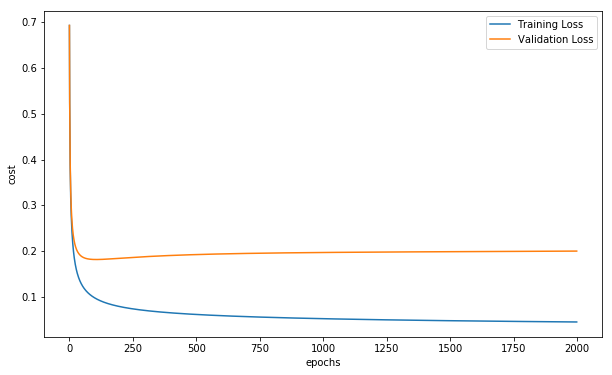

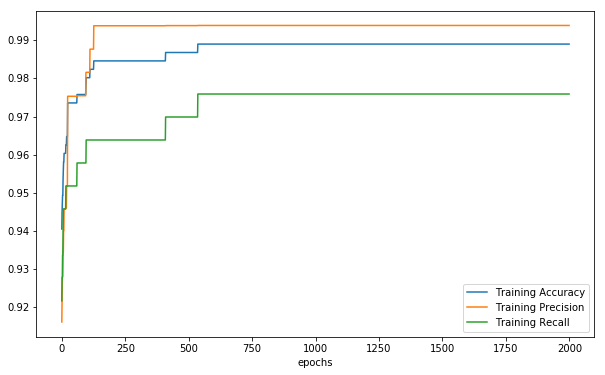

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#readind dataset and dividing it into x & y
training_set = pd.read_csv('wdbc.dataset')
train_x = training_set.iloc[:, 2:]
train_y = training_set.iloc[:, 1:2]

#Mapping M to 1 and B to 0.
train_y = train_y.squeeze().map({'M':1,'B':0})

#splitting into training set and test set.5:4
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size = 0.2)
#splitting test set into test and validation set. 1:1
val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size = 0.5)

#method for normalizing dataset
#start:
def normalize(x):
    x_norm = np.zeros(x.shape)
    mean = np.mean(x, axis = 0)
    sd = np.std(x, axis = 0)
    x_norm = (x-mean)/sd
    return x_norm
#end

train_x_norm = normalize(train_x)
val_x_norm = normalize(val_x)
test_x_norm = normalize(test_x)

#adding bias(1) to train_x
m, n = train_x_norm.shape
train_x_norm = np.concatenate([np.ones((m, 1)), train_x_norm], axis=1)
val_x_norm = np.concatenate([np.ones((val_x_norm.shape[0], 1)), val_x_norm], axis=1)
test_x_norm = np.concatenate([np.ones((test_x_norm.shape[0], 1)), test_x_norm], axis=1)

epochs = 2000
learningrate = 0.1

#initializing weights to 0
w = np.zeros(n + 1)

#Prediction method
#start:
def predict(w, x):
    op = np.zeros(x.shape[0])
    op = np.round(sigmoid(np.dot(x, w)))
    return op
#end

#Method for calculating accuracy, precision and recall of the model
#start:
def getAccuracy(w, x, y):
    p = predict(w, x)
    num = 0
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    
    for i in p:
        if i == 1:
            if y.iloc[num] == 1:
                tp += 1
            else:
                fp += 1
        else:
            if y.iloc[num] == 0:
                tn += 1
            else:
                fn += 1
        num += 1
    
    #print(tp," ",fp," ",tn," ",fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    return accuracy, precision, recall
#end

#sigmoid function
#start:
def sigmoid(z):
    return 1/(1 + np.exp(-z))
#end

#Method for calculating cost
#start:
def costFunction(X, Y, W, m):
    z = np.dot(X, W.T)
    p = sigmoid(z)
    return -np.sum(np.multiply(np.log(p), Y) + np.multiply((1 - Y), np.log(1 - p)))/m, p
#end

#Method for calculating GD
#start:
def gradientDescent(X, Y, w, rate, epochs, X_val, Y_val):
    #w = W.copy()
    losstrack_train = []
    losstrack_val = []
    #losstrack_test = []
    Accuracy = []
    Precision = []
    Recall = []
    for epoch in range(epochs):
        #cost function
        cost_train, p_train = costFunction(X, Y, w, X.shape[0])
        cost_val, p_val = costFunction(X_val, Y_val, w, X_val.shape[0])
        #cost_test = costFunction(X_test, Y_test, w, X_test.shape[0])
        losstrack_train.append(np.squeeze(cost_train))
        losstrack_val.append(np.squeeze(cost_val))
        #losstrack_test.append(np.squeeze(cost_test))
        dz = p_train - Y
        #gradient descent. w := w - ηdw
        dw = (1/m) * np.dot(X.T, dz)
        w = w - (rate * dw)
        accuracy, precision, recall = getAccuracy(w, X, Y)
        Accuracy.append(np.squeeze(accuracy))
        Precision.append(np.squeeze(precision))
        Recall.append(np.squeeze(recall))
    return w, losstrack_train, losstrack_val, Accuracy, Precision, Recall
#end

w, losstrack_train, losstrack_val, Accuracy, Precision, Recall = gradientDescent(train_x_norm, train_y, w, learningrate, epochs, val_x_norm, val_y)
#plots
plt.figure(1, figsize=(10, 6))
plt.plot(losstrack_train, label = 'Training Loss')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend(loc = 'best')
plt.savefig("Training_Loss.png")

plt.figure(2, figsize=(10, 6))
plt.plot(losstrack_train, label = 'Training Loss')
plt.plot(losstrack_val, label = 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend(loc = 'best')
plt.savefig("Training_vs_Validation.png")

plt.figure(3, figsize=(10, 6))
plt.plot(Accuracy, label = 'Training Accuracy')
plt.plot(Precision, label = 'Training Precision')
plt.plot(Recall, label = 'Training Recall')
plt.xlabel('epochs')
plt.legend(loc = 'best')
plt.savefig("Accuracy.png")

#Uncomment the below code for tuning the learning rate.
#start
#learningrates = [.00001, .001, .003, .01, .03, .1, .3, 1, 3, 10, 100, 1000]
#cost = []

#Method for calculating GD for validation set
#start:
#def gradientDescentVal(X, Y, w, rate, epochs):
#    #w = W.copy()
#    losstrack = []
#    for epoch in range(epochs):
#        #cost function
#        cost_val, p_val = costFunction(X, Y, w, X.shape[0])
#        losstrack.append(np.squeeze(cost_val))
#        dz = p_val - Y
#        #gradient descent. w := w - ηdw
#        dw = (1/m) * np.dot(X.T, dz)
#        w = w - (rate * dw)
#    return w, losstrack
#end

#for rate in learningrates:
#    weight = np.zeros(val_x_norm.shape[1])
#    weight, loss = gradientDescentVal(val_x_norm, val_y, weight, rate, 200)
#    cost.append(loss)

#plt.figure(4, figsize=(10, 12))
#num =0
#for x in cost:
#    plt.plot(x, label = 'η = ' + str(learningrates[num]))
#    num += 1

#plt.xlabel('epochs')
#plt.ylabel('cost')
#plt.legend(loc = 'best')

#end

test_accuracy, test_precision, test_recall = getAccuracy(w, test_x_norm, test_y)
print('Test Accuracy: {:.2f}%' .format(test_accuracy * 100))
print('Test Precision: {:.2f}%' .format(test_precision * 100))
print('Test Recall: {:.2f}%' .format(test_recall * 100))